In [8]:
import numpy as np
from numpy import pi, sqrt, exp, sin, cos
import scipy.optimize
from qutip import *
import matplotlib.pyplot as plt

In [9]:
D = np.array([1, -1, 7, -7]) * pi / 12
D = np.diag(D)
D = Qobj(D, dims=[[2, 2], [2, 2]])

V = [[sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(1j * pi / 4),
      sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(-1j * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(1j * 3 * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(-1j * 3 * pi / 4)],
     [sqrt(1 / (6 + 2 * sqrt(3))) * exp(1j * pi / 2),
      sqrt(1 / (6 + 2 * sqrt(3))) * exp(-1j * pi / 2),
      sqrt(1 / (6 - 2 * sqrt(3))) * exp(-1j * pi / 2),
      sqrt(1 / (6 - 2 * sqrt(3))) * exp(1j * pi / 2)],
     [sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(1j * 3 * pi / 4),
      sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(-1j * 3 * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(1j * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(-1j * pi / 4)],
     [sqrt(1 / (6 + 2 * sqrt(3))), sqrt(1 / (6 + 2 * sqrt(3))),
      sqrt(1 / (6 - 2 * sqrt(3))), sqrt(1 / (6 - 2 * sqrt(3)))]]
V = Qobj(V, dims=[[2, 2], [2, 2]])


def U(t):
    return V * (1j * D * t).expm() * V.dag()


In [10]:
def mutual_information(rho):
    return entropy_mutual(rho, 0, 1, base=2)


def U_C(phi1, phi2, theta):
    X = [[exp(1j * phi1) * cos(theta), exp(1j * phi2) * sin(theta)],
         [-exp(-1j * phi2) * sin(theta), exp(-1j * phi1) * cos(theta)]]
    return Qobj(X)


def mutual_inf_c(phi1, phi2, theta, t):
    psi_0 = tensor(basis(2, 0), basis(2, 0))  # |0>x|0>
    psi = U(t) * tensor(U_C(phi1, phi2, theta), identity(2)) * U(t).dag() * psi_0
    rho = ket2dm(psi)
    return entropy_mutual(rho, 0, 1, base=2)


def max_mutual_c(t):
    f = lambda x, t: -mutual_inf_c(x[0], x[1], x[2], t)
    return -scipy.optimize.minimize(f, (1, 1, 1), args=t).fun


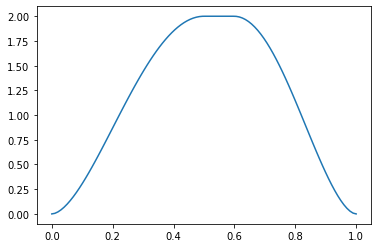

In [11]:
t_arr = np.linspace(0, 1, 100)
I_max = np.zeros_like(t_arr)
for i, t in enumerate(t_arr):
    I_max[i] = max_mutual_c(t)

# print(I_max)

plt.plot(t_arr, I_max)
